In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("housing.csv")

In [3]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

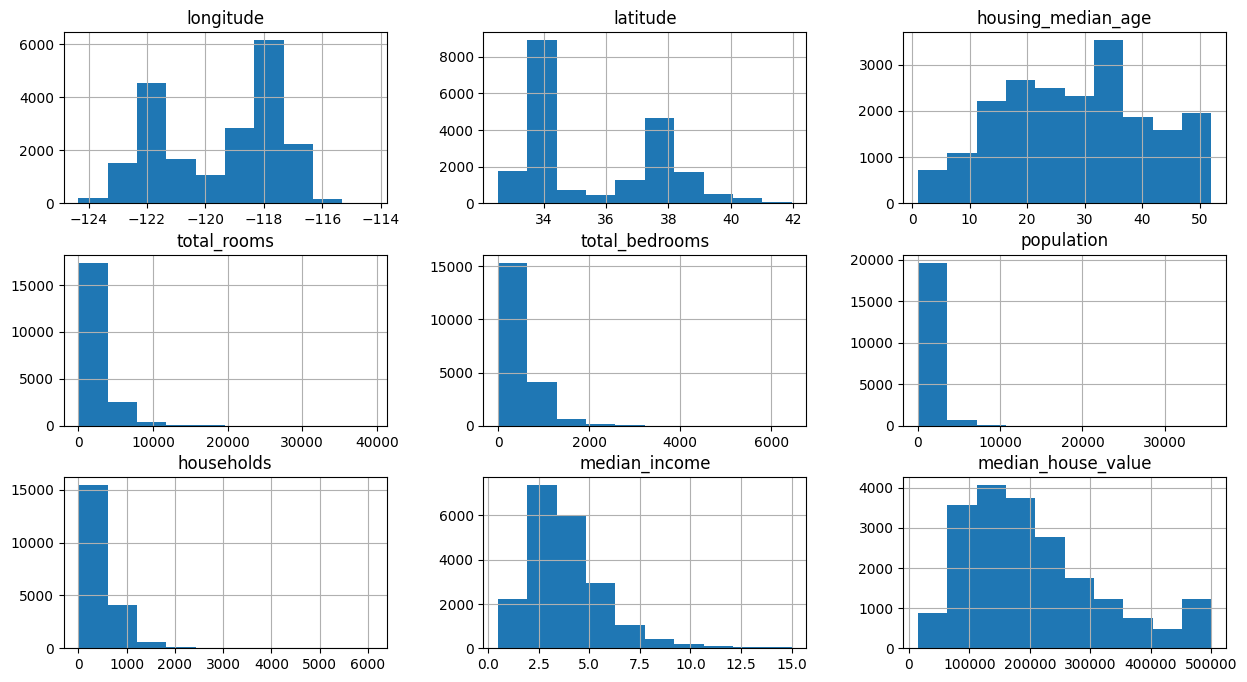

In [8]:
df.hist(figsize=(15,8))

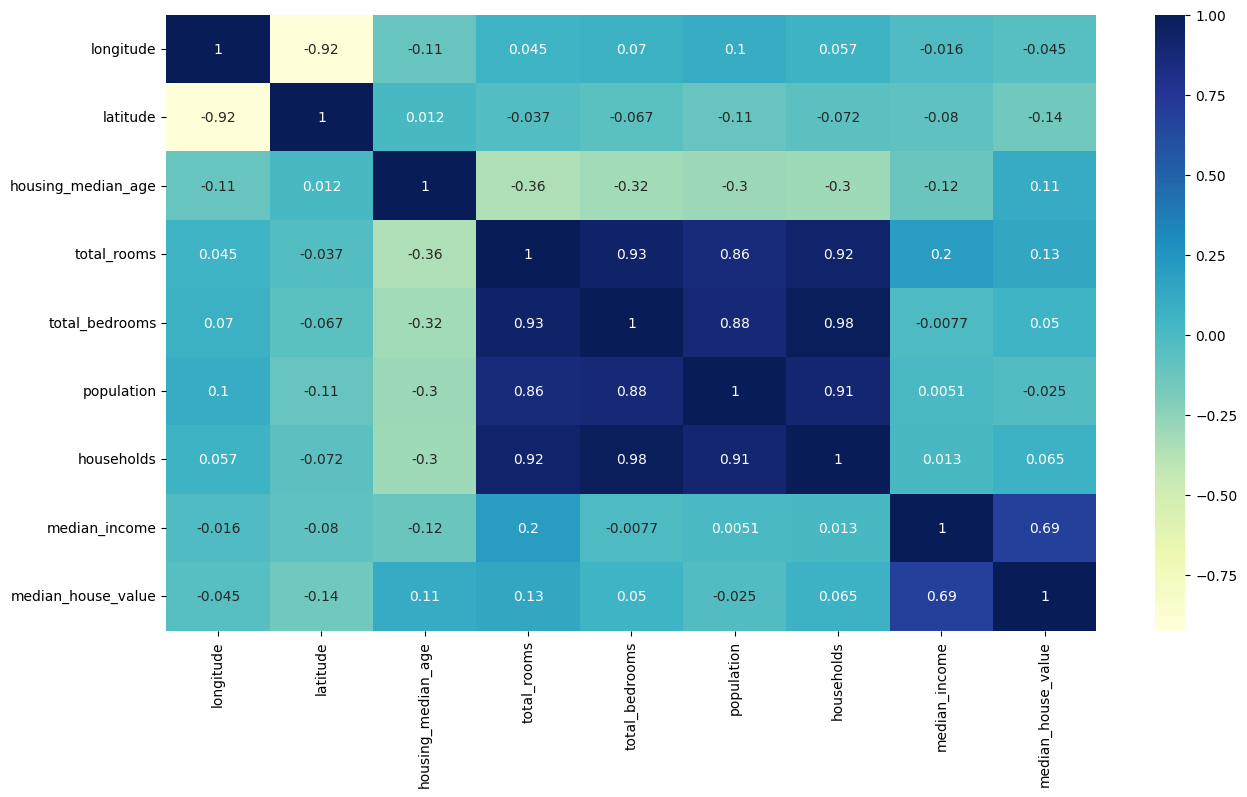

In [9]:
numeric_data = df.select_dtypes(include='number')
plt.figure(figsize=(15, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [10]:
df["total_rooms"]=np.log(df["total_rooms"]+1)
df["total_bedrooms"]=np.log(df["total_bedrooms"]+1)
df["population"]=np.log(df["population"]+1)
df["households"]=np.log(df["households"]+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

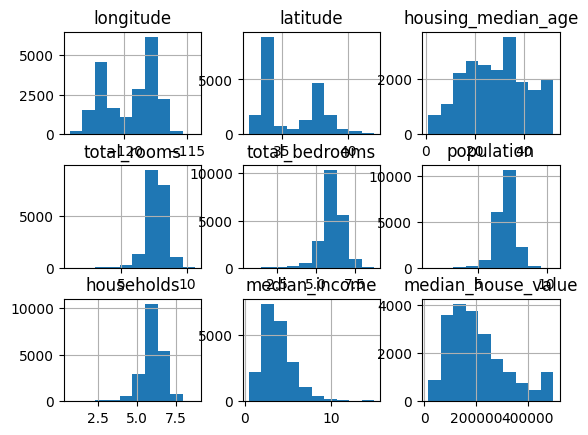

In [11]:
df.hist()

In [12]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [13]:
df=df.join(pd.get_dummies(df.ocean_proximity)).drop(["ocean_proximity"],axis=1)

In [14]:
df.replace({False: 0, True: 1}, inplace=True)

In [15]:
df.rename(columns={'<1H OCEAN': '1HOCEAN'}, inplace=True)

In [16]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0     6.781058        4.867534   
1        -122.22     37.86                21.0     8.867850        7.009409   
2        -122.24     37.85                52.0     7.291656        5.252273   
3        -122.25     37.85                52.0     7.150701        5.463832   
4        -122.25     37.85                52.0     7.395108        5.638355   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0     7.418181        5.926926   
20636    -121.21     39.49                18.0     6.548219        5.017280   
20637    -121.22     39.43                17.0     7.720905        6.186209   
20638    -121.32     39.43                18.0     7.528869        6.016157   
20639    -121.24     39.37                16.0     7.932362        6.424869   

       population  households  median_income  median_house_value  1HOCEAN  \
0        5.777652    4.844187         8.3252            452600.0        0   
1        7.784057    7.037906         8.3014            358500.0        0   
2        6.208590    5.181784         7.2574            352100.0        0   
3        6.326149    5.393628         5.6431            341300.0        0   
4        6.338594    5.560682         3.8462            342200.0        0   
...           ...         ...            ...                 ...      ...   
20635    6.740519    5.802118         1.5603             78100.0        0   
20636    5.877736    4.744932         2.5568             77100.0        0   
20637    6.915723    6.073045         1.7000             92300.0        0   
20638    6.609349    5.857933         1.8672             84700.0        0   
20639    7.235619    6.274762         2.3886             89400.0        0   

       INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
0           0       0         1           0  
1           0       0         1           0  
2           0       0         1           0  
3           0       0         1           0  
4           0       0         1           0  
...       ...     ...       ...         ...  
20635       1       0         0           0  
20636       1       0         0           0  
20637       1       0         0           0  
20638       1       0         0           0  
20639       1       0         0           0  

[20433 rows x 14 columns]

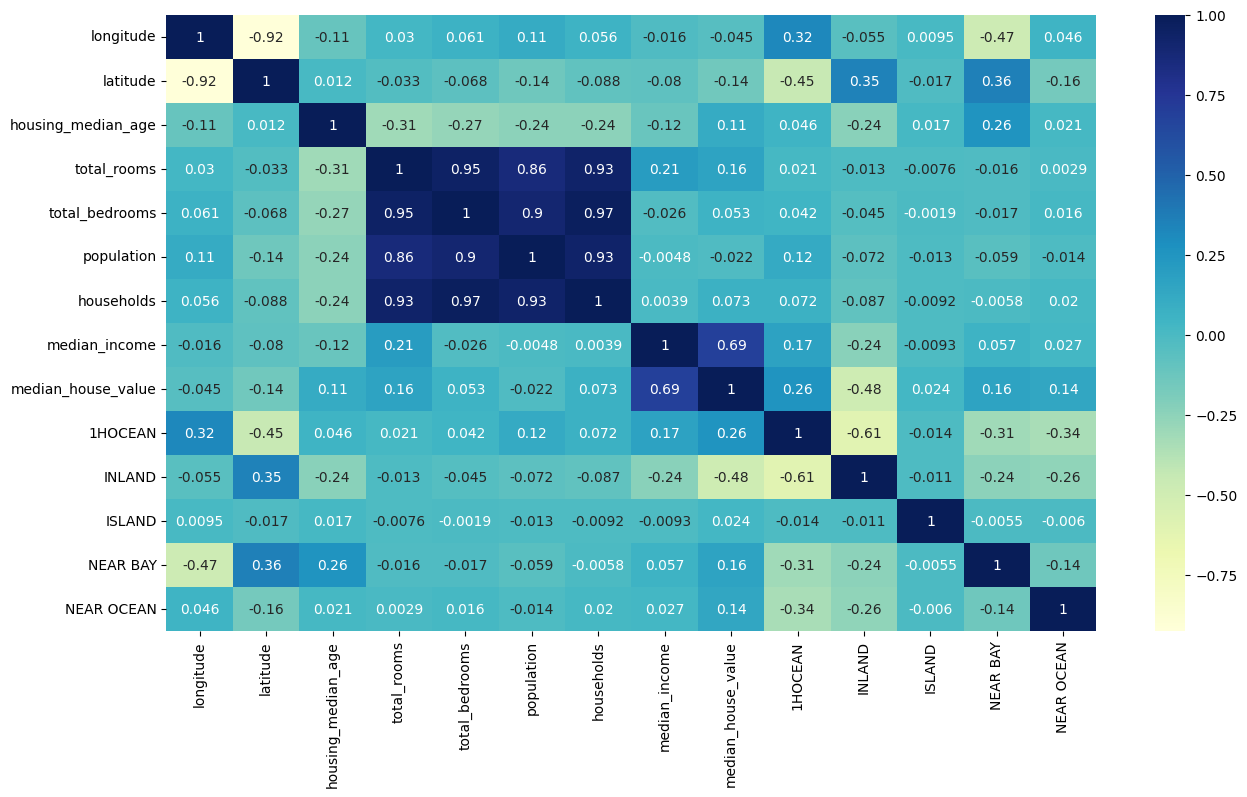

In [17]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

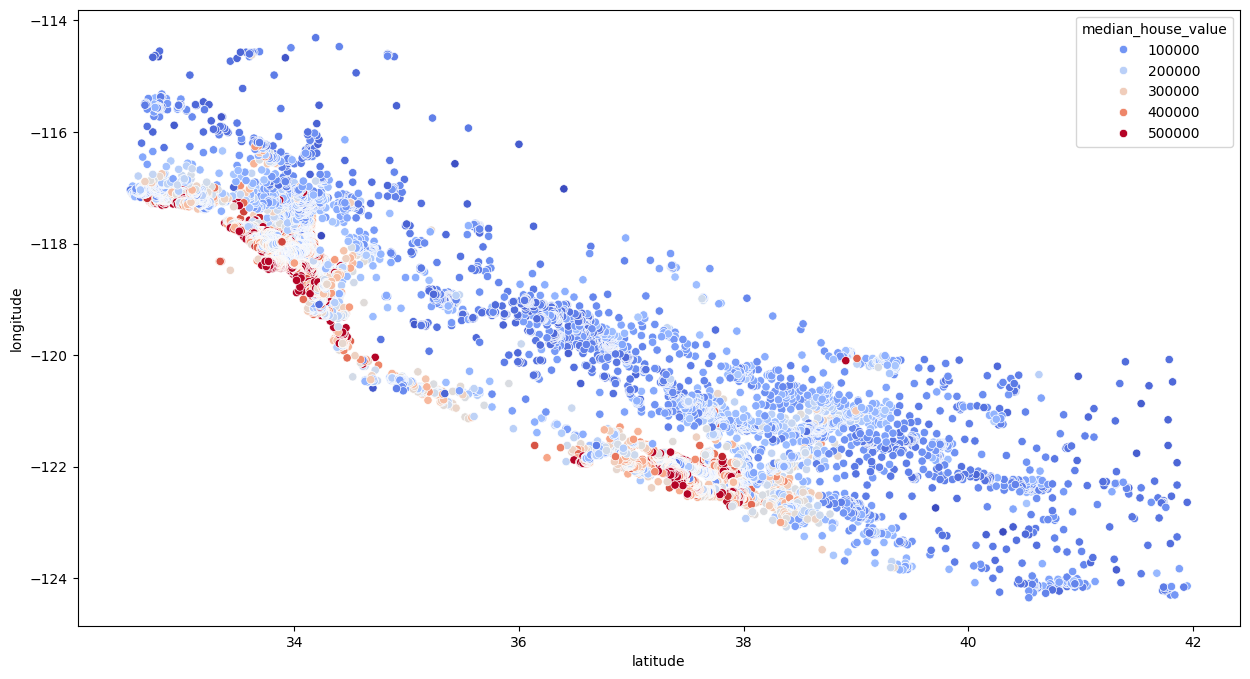

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=df,hue="median_house_value",palette="coolwarm")

In [19]:
df.shape

(20433, 14)

In [20]:
df["bedroom_ratio"]=df["total_bedrooms"]/df["total_rooms"]
df["household_rooms"]=df["total_rooms"]/df["households"]

In [21]:
df.shape

(20433, 16)

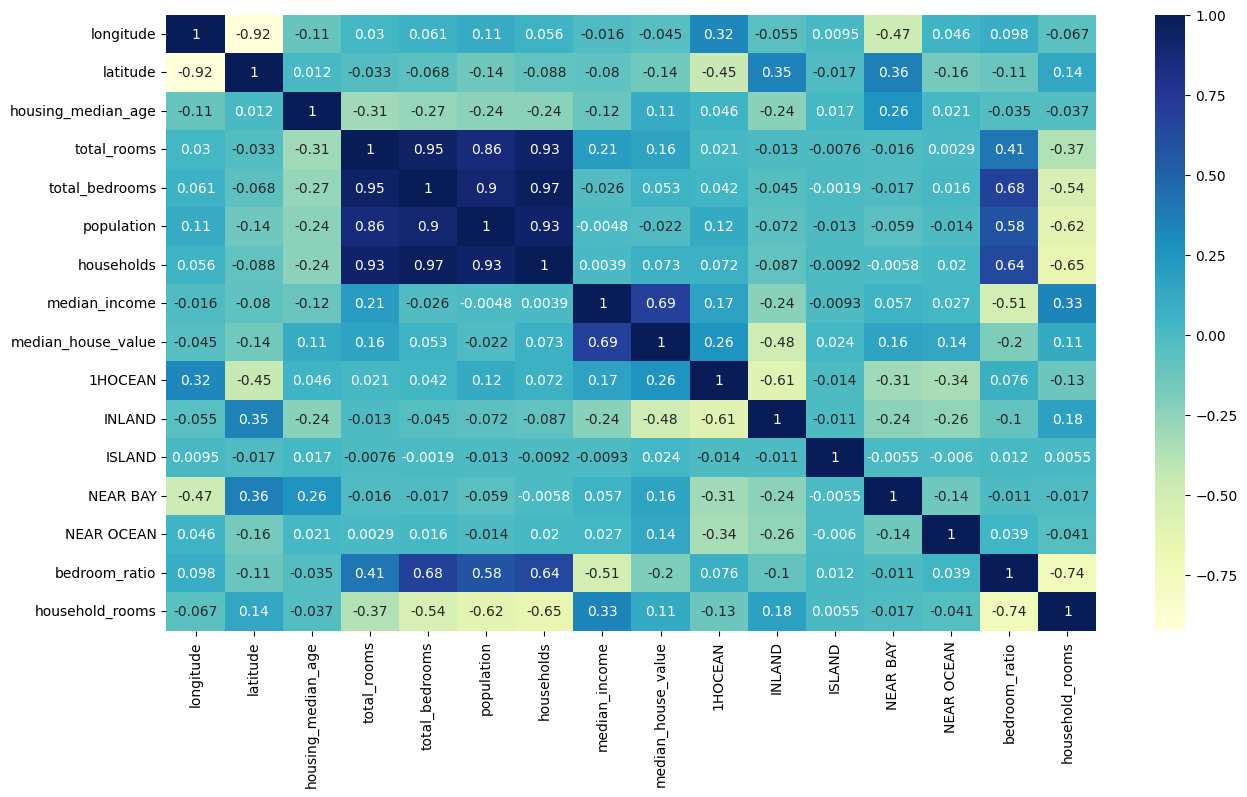

In [22]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
X=df.drop(["median_house_value"],axis=1)
y=df["median_house_value"]

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

In [26]:
"""from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models"""

'from lazypredict.Supervised import LazyRegressor\nreg = LazyRegressor(predictions=True)\nmodels, predictions = reg.fit(X_train, X_test, y_train, y_test)\nmodels'

In [27]:
"""predictions"""

'predictions'

In [28]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '1HOCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN', 'bedroom_ratio', 'household_rooms'],
      dtype='object')

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

rf_regressor = RandomForestRegressor(n_estimators=100)

rf_regressor.fit(X_train_std, y_train)
rf_regressor.score(X_test_std,y_test)

0.8110533871596759